## **D3TOP - Tópicos em Ciência de Dados (IFSP Campinas)**
**Prof. Dr. Samuel Martins (@iamsamucoding @samucoding @xavecoding)** <br/>
xavecoding: https://youtube.com/c/xavecoding <br/><br/>

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

<hr/>

# Spam Text Classification - Sprint 1

We will start solving a **Spam Text Classification** problem. <br/>
In this notebook, we will:
- Get the dataset
- Perform a simple analysis
- Split dataset
- Perform feature extraction with TF-IDF (without text preprocessing)
- Train a simple model (logistic regression)

## 1. Get the Dataset
https://www.kaggle.com/datasets/team-ai/spam-text-message-classification

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./datasets/SPAM text message 20170820 - Data.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## 2. Simple EDA

### 2.1. Info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
# convert datatype from str to category
df['Category'] = df['Category'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Category  5572 non-null   category
 1   Message   5572 non-null   object  
dtypes: category(1), object(1)
memory usage: 49.2+ KB


### 2.2. Class Proportion

In [5]:
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

<AxesSubplot:xlabel='Category', ylabel='count'>

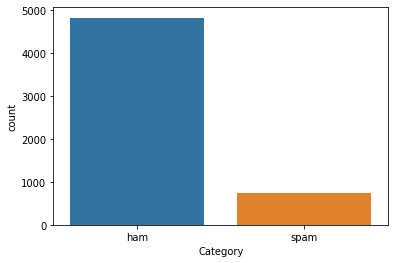

In [6]:
import seaborn as sns

sns.countplot(data=df, x='Category')

The dataset is very imbalanced!

### 2.3. Label Classes

In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(df['Category'])

LabelEncoder()

In [8]:
print(f'Class labels')

for label, class_ in enumerate(label_encoder.classes_):
    print(f'{class_} ==> {label}')

Class labels
ham ==> 0
spam ==> 1


In [9]:
df['Label'] = label_encoder.transform(df['Category'])

In [10]:
df

,Category,Message,Label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


### 2.4. Check blank messages

In [11]:
pd.isna(df['Category']).sum()

0

### 2.5. Word Cloud

Text(0.5, 1.0, 'HAM: Word Cloud')

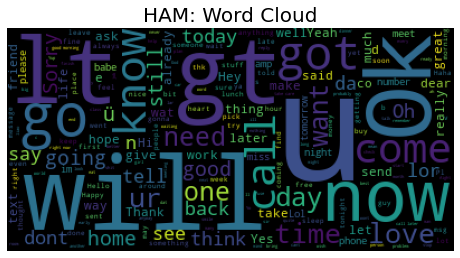

In [12]:
from wordcloud import WordCloud

df_ham = df[df['Category'] == 'ham']

# Generate a word cloud image
text = ' '.join(df_ham['Message'])

wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('HAM: Word Cloud', fontsize=20)

Text(0.5, 1.0, 'SPAM: Word Cloud')

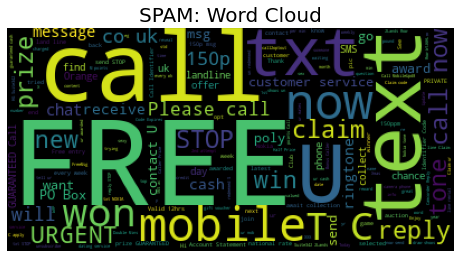

In [13]:
df_spam = df[df['Category'] == 'spam']

# Generate a word cloud image
text = ' '.join(df_spam['Message'])

wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('SPAM: Word Cloud', fontsize=20)

## 3. Split the Dataset

In [14]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, stratify=df['Category'], random_state=42)

In [15]:
print(f"===> TRAIN\n{df_train['Category'].value_counts() / df_train.shape[0]}\n")
print(f"===> TEST\n{df_test['Category'].value_counts() / df_test.shape[0]}")

===> TRAIN
ham     0.865829
spam    0.134171
Name: Category, dtype: float64

===> TEST
ham     0.866368
spam    0.133632
Name: Category, dtype: float64


In [16]:
# save the datasets
df_train.to_csv('./datasets/spam_test_dataset_train.csv', sep=';')
df_test.to_csv('./datasets/spam_test_dataset_test.csv', sep=';')

In [17]:
df_train

,Category,Message,Label
184,ham,"He will, you guys close?",0
2171,ham,CAN I PLEASE COME UP NOW IMIN TOWN.DONTMATTER ...,0
5422,ham,Ok k..sry i knw 2 siva..tats y i askd..,0
4113,ham,"I'll see, but prolly yeah",0
4588,ham,"I'll see if I can swing by in a bit, got some ...",0
...,...,...,...
1932,ham,What pa tell me.. I went to bath:-),0
5316,ham,Jus finish watching tv... U?,0
2309,spam,Moby Pub Quiz.Win a £100 High Street prize if ...,1
1904,spam,Free entry in 2 a weekly comp for a chance to ...,1


## 4. Feature Extraction

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# by default, it performs: lowercasing, remove punctuation, strip accents
tfidf = TfidfVectorizer()

X_train = tfidf.fit_transform(df_train['Message'])
y_train = df_train['Label']

X_test = tfidf.transform(df_test['Message'])
y_test = df_test['Label']

In [19]:
# all words in the vocabulary.
tfidf.vocabulary_

{'he': 3368,
 'will': 7434,
 'you': 7624,
 'guys': 3285,
 'close': 1856,
 'can': 1641,
 'please': 5205,
 'come': 1914,
 'up': 7102,
 'now': 4807,
 'imin': 3624,
 'town': 6922,
 'dontmatter': 2415,
 'if': 3603,
 'urgoin': 7128,
 'outl8r': 4976,
 'just': 3868,
 'reallyneed': 5553,
 '2docd': 387,
 'dontplease': 2416,
 'dontignore': 2414,
 'mycalls': 4640,
 'no': 4765,
 'thecd': 6743,
 'isv': 3754,
 'important': 3632,
 'tome': 6876,
 '2moro': 400,
 'ok': 4884,
 'sry': 6371,
 'knw': 3957,
 'siva': 6143,
 'tats': 6643,
 'askd': 1100,
 'll': 4152,
 'see': 5928,
 'but': 1587,
 'prolly': 5398,
 'yeah': 7596,
 'swing': 6590,
 'by': 1602,
 'in': 3643,
 'bit': 1375,
 'got': 3204,
 'some': 6245,
 'things': 6770,
 'to': 6854,
 'take': 6616,
 'care': 1662,
 'of': 4859,
 'here': 3415,
 'firsg': 2882,
 'shall': 6006,
 'book': 1435,
 'chez': 1783,
 'jules': 3859,
 'for': 2946,
 'half': 3305,
 'eight': 2554,
 'that': 6734,
 'with': 7465,
 'thanks': 6728,
 'your': 7628,
 'message': 4439,
 'really': 5552,


Note that there are a lot of **stop words** and **numbers** that will hinder our classification.

In [20]:
print(f'Vocabulary size: {len(tfidf.vocabulary_)}')

Vocabulary size: 7663


In [21]:
print('Number of Feats')
print(f'Train.shape: {X_train.shape}')
print(f'Test.shape: {X_test.shape}')

Number of Feats
Train.shape: (4457, 7663)
Test.shape: (1115, 7663)


## 5. Train the models

In [37]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(class_weight='balanced')

logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [38]:
# prediction on training set
y_train_pred = logreg.predict(X_train)

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

         ham       1.00      0.99      1.00      3859
        spam       0.95      0.99      0.97       598

    accuracy                           0.99      4457
   macro avg       0.97      0.99      0.98      4457
weighted avg       0.99      0.99      0.99      4457



In [40]:
from sklearn.metrics import f1_score

f1_train = f1_score(y_train, y_train_pred)
print(f'F1 Score Train: {f1_train}')

F1 Score Train: 0.9688524590163935


## 6. Evaluate the model on the Test Set

In [41]:
# prediction on testing set
y_test_pred = logreg.predict(X_test)

In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       966
        spam       0.95      0.93      0.94       149

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [43]:
from sklearn.metrics import f1_score

f1_test = f1_score(y_test, y_test_pred)
print(f'F1 Score Test: {f1_test}')

F1 Score Test: 0.9387755102040818
